In [1]:
!pip install --upgrade datasets
!pip install transformers==4.45.2
!pip install --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 14.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; pl

In [2]:


!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.3 MB/s eta 0:00:00


In [3]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=9ee6d662fd632e0b8667eaa6f3daba80e23a14da46a37d89e79cb2914ee7b6f7
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score


In [4]:
!python -m spacy download en_core_web_lg


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 4.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [5]:
# Import the load_dataset function
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("bitext/Bitext-customer-support-llm-chatbot-training-dataset", split="train")

# Display the first example
print(dataset[0])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/11.9k [00:00<?, ?B/s]

(…)t_Training_Dataset_27K_responses-v11.csv:   0%|          | 0.00/19.2M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/26872 [00:00<?, ? examples/s]

{'flags': 'B', 'instruction': 'question about cancelling order {{Order Number}}', 'category': 'ORDER', 'intent': 'cancel_order', 'response': "I've understood you have a question regarding canceling order {{Order Number}}, and I'm here to provide you with the information you need. Please go ahead and ask your question, and I'll do my best to assist you."}


In [6]:
# Get all unique intents from the train split
unique_categories = set(dataset['category'])

# Print intents sorted alphabetically for readability
print("Available categories in the dataset:")
for category in sorted(unique_categories):
    print(category)


Available categories in the dataset:
ACCOUNT
CANCEL
CONTACT
DELIVERY
FEEDBACK
INVOICE
ORDER
PAYMENT
REFUND
SHIPPING
SUBSCRIPTION


In [7]:
KEEP_categories = [
    "ACCOUNT",
    "CANCEL",
    "CONTACT",
    "FEEDBACK",
    "INVOICE",
    "PAYMENT",
    "REFUND",
    "SUBSCRIPTION",
]

In [8]:
# Get all unique intents from the train split
unique_intents = set(dataset['intent'])

# Print intents sorted alphabetically for readability
print("Available intents in the dataset:")
for intent in sorted(unique_intents):
    print(intent)


Available intents in the dataset:
cancel_order
change_order
change_shipping_address
check_cancellation_fee
check_invoice
check_payment_methods
check_refund_policy
complaint
contact_customer_service
contact_human_agent
create_account
delete_account
delivery_options
delivery_period
edit_account
get_invoice
get_refund
newsletter_subscription
payment_issue
place_order
recover_password
registration_problems
review
set_up_shipping_address
switch_account
track_order
track_refund


In [9]:
KEEP_INTENTS = [
    "check_invoice",
    "check_payment_methods",
    "check_refund_policy",
    "complaint",
    "contact_customer_service",
    "contact_human_agent",
    "create_account",
    "delete_account",
    "edit_account",
    "get_invoice",
    "registration_problems",
    "switch_account",

]


In [10]:
def keep(example):
    return example["intent"] in KEEP_INTENTS

filtered_dataset = dataset.filter(keep)
print("Filtered rows:", len(filtered_dataset))

Filter:   0%|          | 0/26872 [00:00<?, ? examples/s]

Filtered rows: 11985


In [11]:
filtered_dataset


Dataset({
    features: ['flags', 'instruction', 'category', 'intent', 'response'],
    num_rows: 11985
})

In [12]:
from collections import Counter

# Count how many samples per intent
intent_counts = Counter(filtered_dataset['intent'])

print("\nIntent Counts:")
for intent, count in intent_counts.items():
    print(f"{intent}: {count}")



Intent Counts:
check_invoice: 1000
check_payment_methods: 999
check_refund_policy: 997
complaint: 1000
contact_customer_service: 1000
contact_human_agent: 999
create_account: 997
delete_account: 995
edit_account: 1000
get_invoice: 999
registration_problems: 999
switch_account: 1000


In [13]:
# View the first few examples
for i in range(5):
    print(f"\nExample {i+1}:\n", filtered_dataset[i])



Example 1:
 {'flags': 'BZ', 'instruction': 'show me invoice{{Invoice Number}}', 'category': 'INVOICE', 'intent': 'check_invoice', 'response': 'I understand your need to locate your bill with invoice number {{Invoice Number}}. Let me assist you with that. Please give me a moment to check our records and find the necessary information for you.'}

Example 2:
 {'flags': 'BLMQZ', 'instruction': 'need to see my invoicesfrom {{Person Name}}', 'category': 'INVOICE', 'intent': 'check_invoice', 'response': 'Certainly! I understand that you are looking to view your invoices from {{Person Name}}. To assist you further, could you please provide me with the specific date range or any other relevant details related to these invoices? This will help me locate the invoices accurately and promptly. Rest assured, I am here to guide you through the process and ensure you have access to the information you need.'}

Example 3:
 {'flags': 'BCL', 'instruction': 'I have to see my invoice from {{Person Name}},

In [14]:
# Shows feature (column) names and types
print(filtered_dataset.features)


{'flags': Value(dtype='string', id=None), 'instruction': Value(dtype='string', id=None), 'category': Value(dtype='string', id=None), 'intent': Value(dtype='string', id=None), 'response': Value(dtype='string', id=None)}


In [15]:
# Check if any example has a missing field
missing_count = 0
for example in filtered_dataset:
    if not example['response'] or example['response'] is None:
        missing_count += 1

print("Missing 'response' values:", missing_count)



Missing 'response' values: 0


In [16]:
# Check if any example has a missing field
missing_count = 0
for example in filtered_dataset:
    if not example['instruction'] or example['instruction'] is None:
        missing_count += 1

print("Missing 'instruction' values:", missing_count)


Missing 'instruction' values: 0


In [17]:
# Check if any example has a missing field
missing_count = 0
for example in filtered_dataset:
    if not example['intent'] or example['intent'] is None:
        missing_count += 1

print("Missing 'intent' values:", missing_count)


Missing 'intent' values: 0


In [18]:
# Check if any example has a missing field
missing_count = 0
for example in filtered_dataset:
    if not example['category'] or example['category'] is None:
        missing_count += 1

print("Missing 'category' values:", missing_count)


Missing 'category' values: 0


In [19]:
# Check if any example has a missing field
missing_count = 0
for example in filtered_dataset:
    if not example['flags'] or example['flags'] is None:
        missing_count += 1

print("Missing 'flags' values:", missing_count)

Missing 'flags' values: 0


In [20]:
seen = set()
duplicates = 0
for ex in filtered_dataset:
    key = (ex['instruction'], ex['response'])
    if key in seen:
        duplicates += 1
    seen.add(key)

print("Duplicate instruction-response pairs:", duplicates)


Duplicate instruction-response pairs: 0


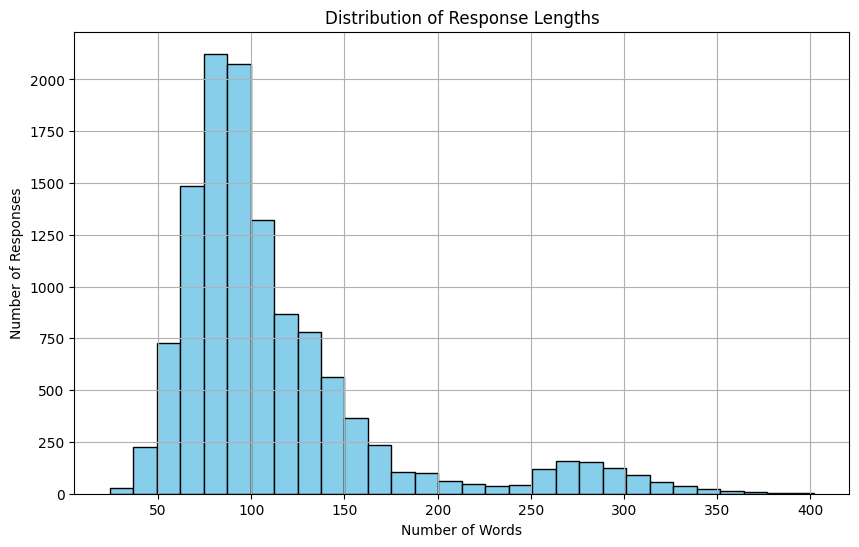

In [21]:
import matplotlib.pyplot as plt

# Calculate number of words in each response
response_lengths = [len(example['response'].split()) for example in filtered_dataset]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(response_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Response Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Number of Responses')
plt.grid(True)
plt.show()


In [22]:
print("Min:", min(response_lengths))
print("Max:", max(response_lengths))
print("Average:", sum(response_lengths) / len(response_lengths))


Min: 24
Max: 402
Average: 112.66141009595327


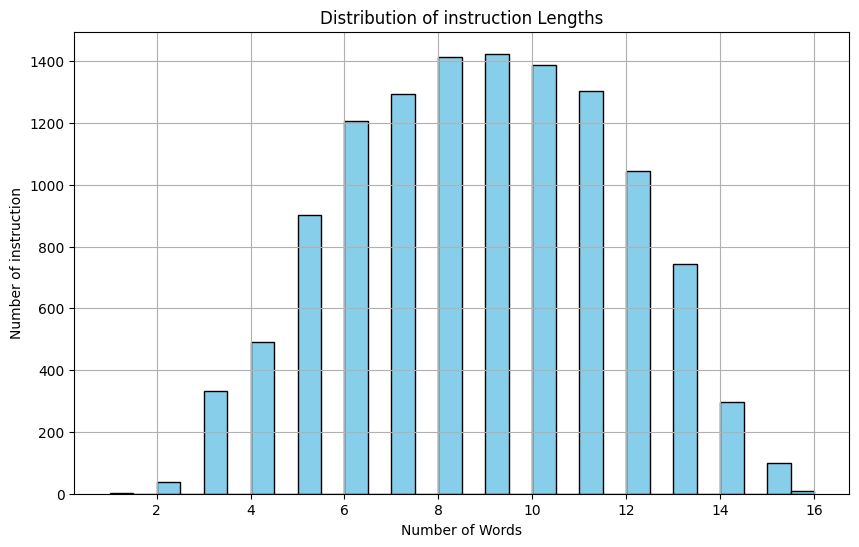

In [23]:
import matplotlib.pyplot as plt

# Calculate number of words in each response
instruction_lengths = [len(example['instruction'].split()) for example in filtered_dataset]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(instruction_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of instruction Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Number of instruction')
plt.grid(True)
plt.show()

In [24]:
print("Min:", min(instruction_lengths))
print("Max:", max(instruction_lengths))
print("Average:", sum(instruction_lengths) / len(instruction_lengths))

Min: 1
Max: 16
Average: 8.690279516061743


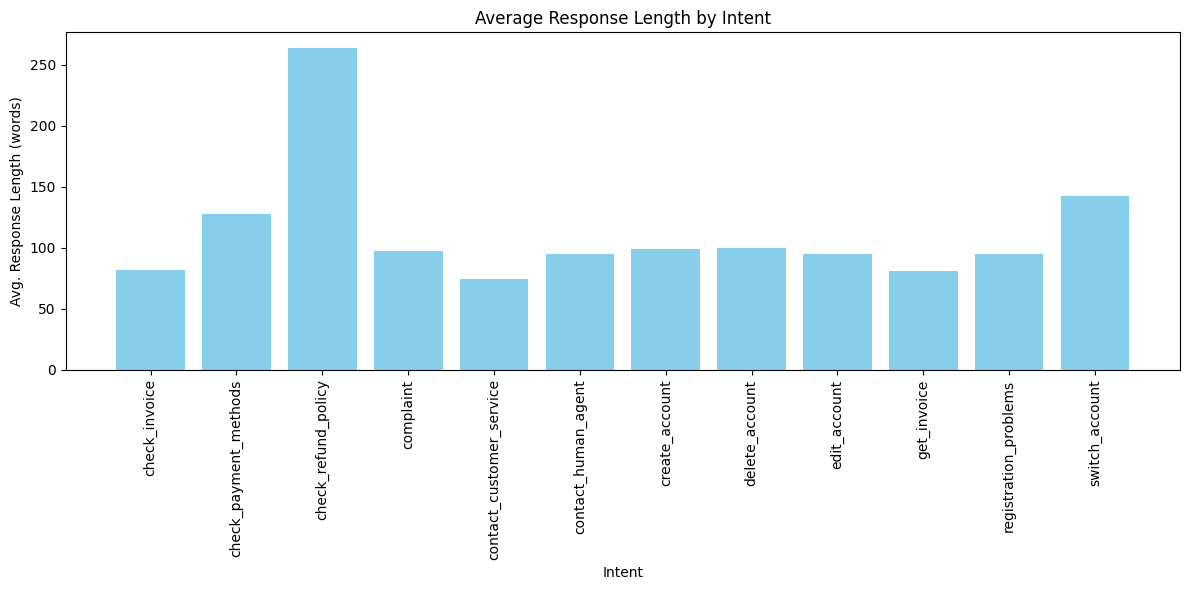

In [25]:

from collections import defaultdict
import numpy as np

lengths_by_intent = defaultdict(list)

for ex in filtered_dataset:
    lengths_by_intent[ex['intent']].append(len(ex['response'].split()))

# Average length per intent
avg_lengths = {intent: np.mean(lengths) for intent, lengths in lengths_by_intent.items()}

# Plot
plt.figure(figsize=(12, 6))
plt.bar(avg_lengths.keys(), avg_lengths.values(), color='skyblue')
plt.xticks(rotation=90)
plt.title("Average Response Length by Intent")
plt.xlabel("Intent")
plt.ylabel("Avg. Response Length (words)")
plt.tight_layout()
plt.show()


In [26]:
import re

def count_placeholders(text):
    return len(re.findall(r"\{\{.*?\}\}", text))

placeholder_counts = [count_placeholders(ex['response']) for ex in filtered_dataset]

print("Total examples with placeholders:", sum([1 for c in placeholder_counts if c > 0]))


Total examples with placeholders: 6454


In [27]:
import re

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Replace {{placeholders}} → [PLACEHOLDER_NAME]
    text = re.sub(r"\{\{ *([^}]+?) *\}\}", lambda m: f"[{m.group(1).upper().replace(' ', '_')}]", text)
    # Replace numbers → [NUMBER]
    text = re.sub(r"\b\d+\b", "[NUMBER]", text)
    # Remove specific punctuation characters: . ? ! #
    text = re.sub(r"[.?!#]", "", text)
    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()
    return text





In [28]:
def clean_example(example):
    return {
        "instruction": clean_text(example["instruction"]),
        "response": clean_text(example["response"])
    }

# Apply cleaning to the filtered dataset
cleaned_dataset = filtered_dataset.map(clean_example)

# Print first 15 examples before and after cleaning
for i in range(15):
    print(f"Example {i+1} Before Cleaning:")
    print("Instruction:", filtered_dataset[i]["instruction"])
    print("Response:", filtered_dataset[i]["response"])
    print(f"\nExample {i+1} After Cleaning:")
    print("Instruction:", cleaned_dataset[i]["instruction"])
    print("Response:", cleaned_dataset[i]["response"])
    print("-" * 80)



Map:   0%|          | 0/11985 [00:00<?, ? examples/s]

Example 1 Before Cleaning:
Instruction: show me invoice{{Invoice Number}}
Response: I understand your need to locate your bill with invoice number {{Invoice Number}}. Let me assist you with that. Please give me a moment to check our records and find the necessary information for you.

Example 1 After Cleaning:
Instruction: show me invoice[INVOICE_NUMBER]
Response: i understand your need to locate your bill with invoice number [INVOICE_NUMBER] let me assist you with that please give me a moment to check our records and find the necessary information for you
--------------------------------------------------------------------------------
Example 2 Before Cleaning:
Instruction: need to see my invoicesfrom {{Person Name}}
Response: Certainly! I understand that you are looking to view your invoices from {{Person Name}}. To assist you further, could you please provide me with the specific date range or any other relevant details related to these invoices? This will help me locate the invoice

In [29]:
from datasets import DatasetDict

# Step 1: Split 80% train, 20% temp (for val + test)
train_val_test = cleaned_dataset.train_test_split(test_size=0.2, seed=42)

# Step 2: Split 20% temp into 10% val, 10% test (i.e., half-half of the 20%)
val_test = train_val_test['test'].train_test_split(test_size=0.5, seed=42)

# Step 3: Combine splits into a DatasetDict
dataset_split = DatasetDict({
    'train': train_val_test['train'],
    'validation': val_test['train'],
    'test': val_test['test']
})

# Step 4: Print sizes
print(f"Train size: {len(dataset_split['train'])}")
print(f"Validation size: {len(dataset_split['validation'])}")
print(f"Test size: {len(dataset_split['test'])}")


Train size: 9588
Validation size: 1198
Test size: 1199


In [30]:
print(dataset_split)

DatasetDict({
    train: Dataset({
        features: ['flags', 'instruction', 'category', 'intent', 'response'],
        num_rows: 9588
    })
    validation: Dataset({
        features: ['flags', 'instruction', 'category', 'intent', 'response'],
        num_rows: 1198
    })
    test: Dataset({
        features: ['flags', 'instruction', 'category', 'intent', 'response'],
        num_rows: 1199
    })
})


In [31]:
from transformers import T5Tokenizer, T5ForConditionalGeneration,TrainingArguments , Trainer
# Load language model
tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [32]:
def DataTokenization(example,InputCol,OutputCol,max_length):
    model_inputs = tokenizer(example[InputCol], max_length=max_length, truncation=True, padding="max_length")
    labels = tokenizer(example[OutputCol], max_length=max_length, truncation=True, padding="max_length")
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs


In [33]:
tokenized_dataset = dataset_split.map(DataTokenization,
                                fn_kwargs={
                                    'InputCol':'instruction',
                                    'OutputCol':'response',
                                    'max_length':16

                                },
                                        batched=True)

Map:   0%|          | 0/9588 [00:00<?, ? examples/s]

Map:   0%|          | 0/1198 [00:00<?, ? examples/s]

Map:   0%|          | 0/1199 [00:00<?, ? examples/s]

In [34]:
import os
os.environ["WANDB_MODE"] = "disabled"


In [35]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments, EarlyStoppingCallback
import torch
import evaluate
from datasets import Dataset

# Load ROUGE metric
evaluation = evaluate.load("rouge")

train_dataset = tokenized_dataset['train'].select(range(2000))
eval_dataset= tokenized_dataset['train'].select(range(600))


def compute_metrics(eval_pred):
    predictions, labels = eval_pred

    # Convert predictions to list and remove -100s
    predictions = predictions.tolist()
    predictions = [[token if token != -100 else tokenizer.pad_token_id for token in pred] for pred in predictions]

    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)

    # Process labels
    labels = [[token if token != -100 else tokenizer.pad_token_id for token in label] for label in labels]
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    result = evaluation.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)
    return {k: round(v, 4) for k, v in result.items()}



training_args = Seq2SeqTrainingArguments(
    output_dir="./t5-finetuned-qa",
    per_device_train_batch_size=5,
    num_train_epochs=3,
    logging_dir="./logs",
    logging_steps=20,
    predict_with_generate=True,
    generation_max_length=64,
    generation_num_beams=4,
    fp16=False,
    report_to="none",
)



trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset = train_dataset,
    eval_dataset= eval_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,


)


In [36]:
trainer.train()


Step,Training Loss
20,4.576200
40,3.991000
60,3.554500
80,3.553400
100,3.363300
120,3.127900
140,3.030900
160,2.951200
180,2.769300
200,2.804000


TrainOutput(global_step=1200, training_loss=2.358684539794922, metrics={'train_runtime': 1832.7015, 'train_samples_per_second': 3.274, 'train_steps_per_second': 0.655, 'total_flos': 25376587776000.0, 'train_loss': 2.358684539794922, 'epoch': 3.0})

In [37]:
eval_results = trainer.evaluate()
print(eval_results)

{'eval_loss': 1.6598639488220215, 'eval_rouge1': 0.3947, 'eval_rouge2': 0.1789, 'eval_rougeL': 0.3598, 'eval_rougeLsum': 0.3598, 'eval_runtime': 370.084, 'eval_samples_per_second': 1.621, 'eval_steps_per_second': 0.203, 'epoch': 3.0}


In [38]:
trainer.save_model("./t5-finetuned-qa")
tokenizer.save_pretrained("./t5-finetuned-qa")

('./t5-finetuned-qa/tokenizer_config.json',
 './t5-finetuned-qa/special_tokens_map.json',
 './t5-finetuned-qa/spiece.model',
 './t5-finetuned-qa/added_tokens.json')

In [40]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load the tokenizer and model
tokenizer = T5Tokenizer.from_pretrained("./t5-finetuned-qa")
model = T5ForConditionalGeneration.from_pretrained("./t5-finetuned-qa")


In [45]:
import sqlite3

# Connect to SQLite database (creates file if it doesn't exist)
conn = sqlite3.connect("clinic.db")
cursor = conn.cursor()

# Full cleaned SQL script
sql_script = """
DROP TABLE IF EXISTS doctors;

CREATE TABLE doctors (
    doctor_id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT,
    specialization TEXT,
    fees REAL,
    room TEXT,
    schedule_day TEXT
);

INSERT INTO doctors (doctor_id, name, specialization, fees, room, schedule_day) VALUES
 (1, 'dr. ahmed hassan', 'cardiology', 500.00, '101', 'sunday'),
    (2, 'dr. omar mostafa', 'pediatrics', 400.00, '102', 'monday'),
    (3, 'dr. tarek el gendy', 'orthopedics', 450.00, '103', 'tuesday'),
    (4, 'dr. mohamed youssef', 'neurology', 550.00, '104', 'wednesday'),
    (5, 'dr. hossam ali', 'gastroenterology', 420.00, '105', 'thursday');
"""

# Run the script
cursor.executescript(sql_script)
conn.commit()
conn.close()

print("Database and table created with sample data.")

Database and table created with sample data.


In [46]:
import spacy
import sqlite3
import re

# Load once outside function for speed
nlp = spacy.load("en_core_web_lg")
if "entity_ruler" not in nlp.pipe_names:
    ruler = nlp.add_pipe("entity_ruler", before="ner")
    patterns = [
        {"label": "Specialization", "pattern": "cardiology"},
        {"label": "Occupation", "pattern": "doctor"},
        {"label": "Occupation", "pattern": "dr."},

    ]
    ruler.add_patterns(patterns)


In [47]:

def Extracting_info(text):
    relationships = []
    doc = nlp(text)
    extracted = {}
    for ent in doc.ents:
        extracted[ent.label_] = ent.text
        print(ent.text, "\t", ent.label_)

    for token in doc:
        if token.dep_ == 'ROOT':
            relationships.append((token.head.text, token.text, token.dep_))
    return extracted



In [49]:
def Query(extracted_info, cursor):
    entity_to_column = {
        "PERSON": "name",
        "Specialization": "specialization",
        "Money": "fees",
        "Location": "room",
        "Date": "schedule_day"
    }

    conditions = []
    values = []

    for entity_label, value in extracted_info.items():
        column = entity_to_column.get(entity_label)
        if not column:
            continue

        if column in ["name", "specialization", "room", "schedule_day"]:
            conditions.append(f"LOWER({column}) = LOWER(?)")
        else:
            conditions.append(f"{column} = ?")
        values.append(value)

    query = "SELECT * FROM doctors"
    if conditions:
        query += " WHERE " + " AND ".join(conditions)

    cursor.execute(query, values)
    return cursor.fetchall()


def format_results(results):
    formatted = []
    for row in results:
        # Assuming row schema: (id, name, specialization, fees, room, schedule_day)
        formatted.append(
            f"Dr. {row[1]}, specialization: {row[2]}, fees: {row[3]}, room: {row[4]}, schedule: {row[5]}"
        )
    return "\n".join(formatted)



")


SyntaxError: unterminated string literal (detected at line 43) (<ipython-input-49-bbc0c231983b>, line 43)

In [55]:
user_input = "Name the doctors specialized in Cardiology?"

user_input = clean_text(user_input)

# Step 1: Extract entities/relations
extracted_entities = Extracting_info(user_input)


conn = sqlite3.connect("clinic.db")
cursor = conn.cursor()
# Step 2: Query the DB



query_results = Query(extracted_entities, cursor)

# Step 3: Build combined input prompt
combined_input = (
    f"Instruction: {user_input}\n"
    f"Database info: {query_results}\n"
    f"Response:using {query_results} "
)
print(query_results)





if query_results:
    query_text = format_results(query_results)

    input_ids = tokenizer.encode(query_text, return_tensors="pt")
    output_ids = model.generate(input_ids, max_length=200, num_beams=7)
    decoded_response = tokenizer.decode(output_ids[0], skip_special_tokens=True)

    print(decoded_response)
else:
    print("No matching doctors found.")

cardiology 	 Specialization
[(1, 'dr. ahmed hassan', 'cardiology', 500.0, '101', 'sunday')]
dr. dr. ahmed hassan, specialization: cardiology, fees: 500.0, room: 101, schedule: sunday


In [57]:
input_ids = tokenizer.encode(combined_input, return_tensors="pt")
output_ids = model.generate(input_ids, max_length=200, num_beams=5)
decoded_response = tokenizer.decode(output_ids[0], skip_special_tokens=True)

print(decoded_response)

i'm here to help i understand your need to name the doctors specialized in cardiology Database info: [(1, 'dr. ahmed hassan', 'cardiology', 500.0, '101','sunday')]
